In [2]:
!pip install yfinance

import pandas as pd
import yfinance as yf
from datetime import date, timedelta

# Get today's date
today = date.today()
d1 = today.strftime("%Y-%m-%d")
end_date = d1

# Get date from 1 year ago
d2 = date.today() - timedelta(days=365)
d2 = d2.strftime("%Y-%m-%d")
start_date = d2

# Download stock data
data = yf.download('GOOG',
                   start=start_date,
                   end=end_date,
                   progress=False)

# Clean up data
data["Date"] = data.index
data = data[["Date", "Open", "High", "Low", "Close", "Volume"]]
data.reset_index(drop=True, inplace=True)

# Show last 5 rows
print(data.tail())


/tmp/ipython-input-2562304906.py:18: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download('GOOG',


Price        Date        Open        High         Low       Close    Volume
Ticker                   GOOG        GOOG        GOOG        GOOG      GOOG
244    2025-08-11  201.554993  202.160004  199.800003  201.630005  16690200
245    2025-08-12  202.095001  205.130005  201.399994  204.160004  19854000
246    2025-08-13  204.979996  205.429993  198.639999  203.029999  19573000
247    2025-08-14  202.559998  205.419998  202.324997  203.820007  17777100
248    2025-08-15  204.720001  207.330002  202.085007  204.910004  21101100


In [3]:
data = data[["Date", "Close"]]
print(data.head())


Price        Date       Close
Ticker                   GOOG
0      2024-08-19  167.595413
1      2024-08-20  168.152756
2      2024-08-21  166.829102
3      2024-08-22  164.699326
4      2024-08-23  166.630051


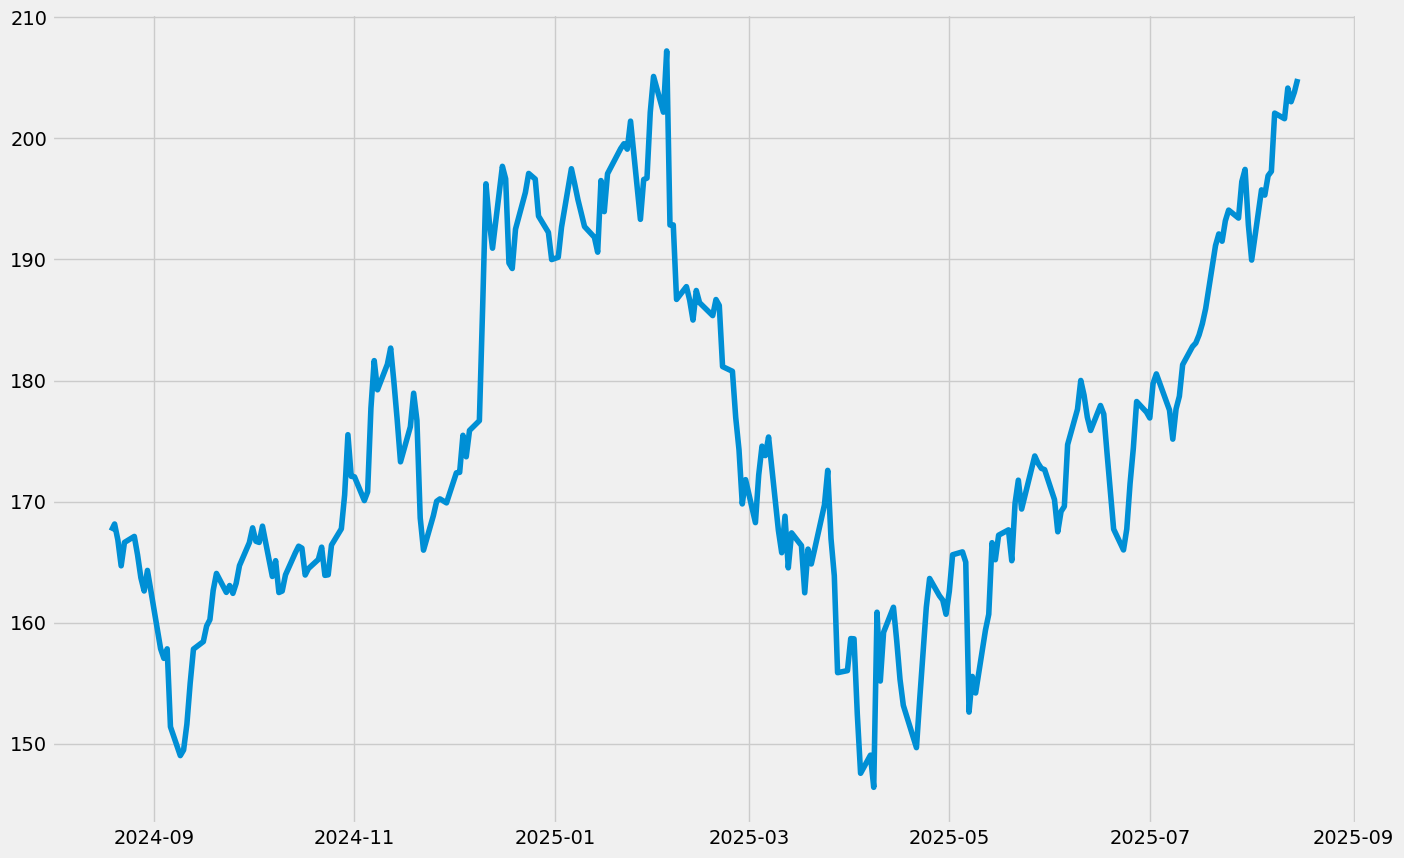

In [4]:
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
plt.figure(figsize=(15, 10))
plt.plot(data["Date"], data["Close"])

<Figure size 640x480 with 0 Axes>

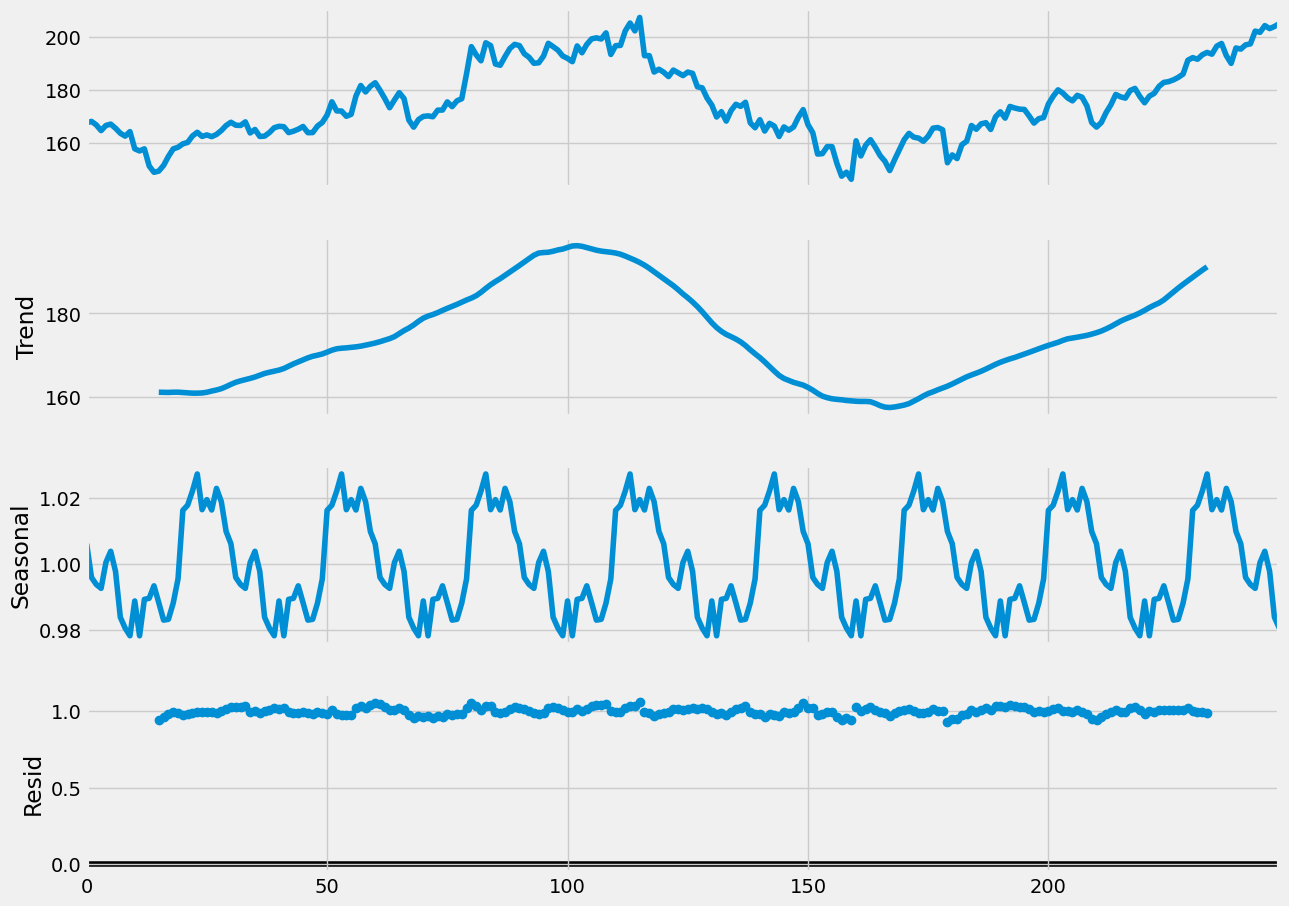

In [5]:
from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(data["Close"],
                            model='multiplicative', period = 30)
fig = plt.figure()
fig = result.plot()
fig.set_size_inches(15, 10)

<Axes: xlabel='Lag', ylabel='Autocorrelation'>

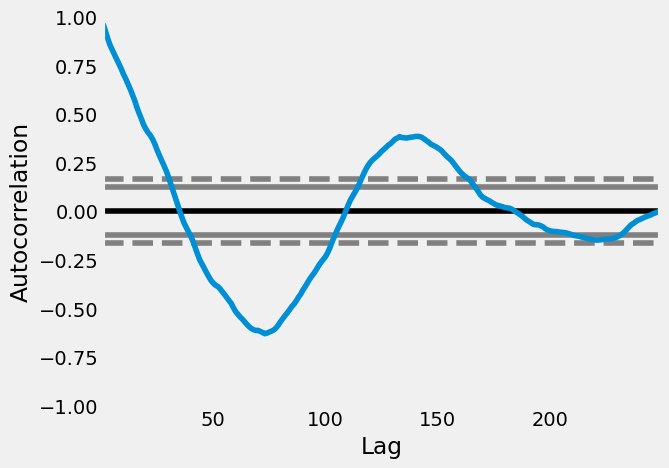

In [6]:
pd.plotting.autocorrelation_plot(data["Close"])


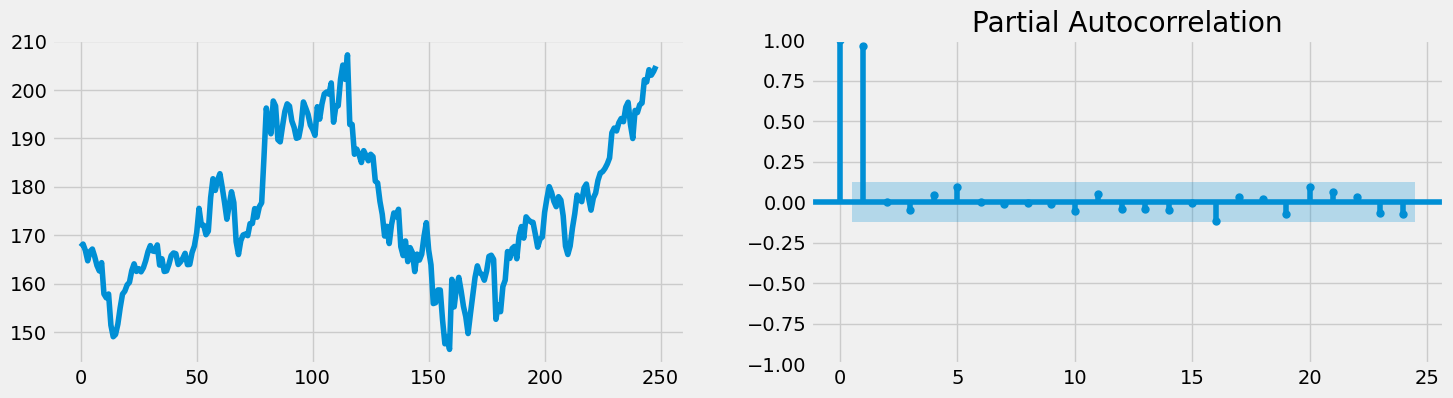

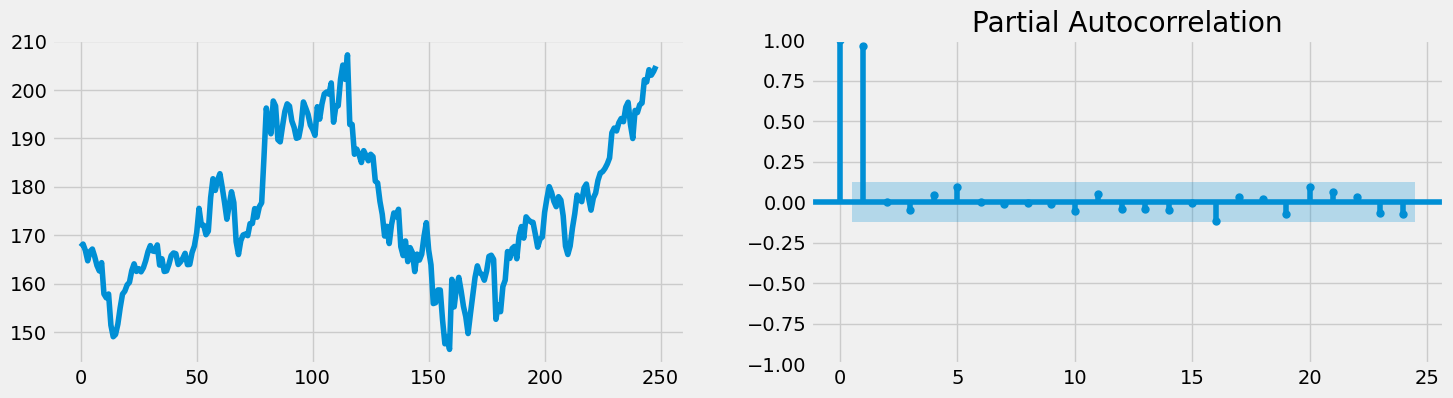

In [7]:
from statsmodels.graphics.tsaplots import plot_pacf
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(16,4))
ax1.plot(data['Close'])
plot_pacf(data["Close"],ax=ax2)

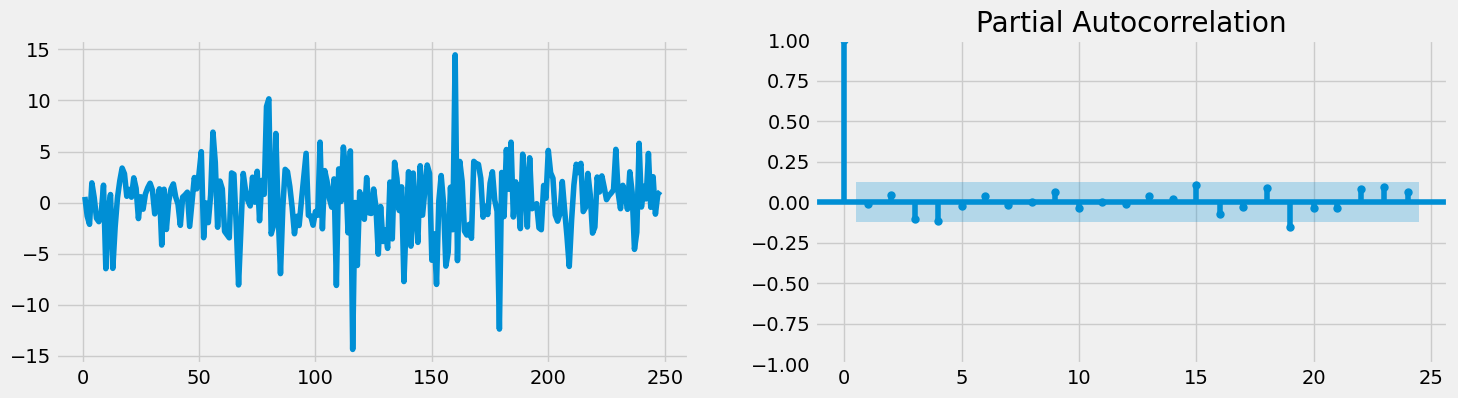

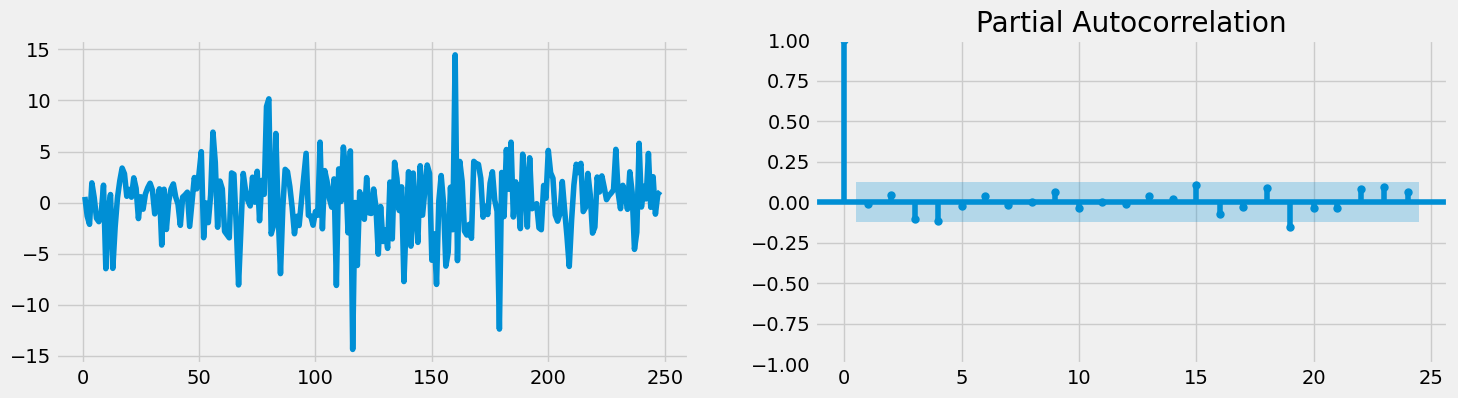

In [8]:
diff=data['Close'].diff().dropna()
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(16,4))
ax1.plot(diff)
plot_pacf(diff,ax=ax2)

In [4]:
!pip install yfinance

import pandas as pd
import yfinance as yf
from datetime import date, timedelta

# Get today's date
today = date.today()
d1 = today.strftime("%Y-%m-%d")
end_date = d1

# Get date from 1 year ago
d2 = date.today() - timedelta(days=365)
d2 = d2.strftime("%Y-%m-%d")
start_date = d2

# Download stock data
data = yf.download('GOOG',
                   start=start_date,
                   end=end_date,
                   progress=False)

# Clean up data
data["Date"] = data.index
data = data[["Date", "Open", "High", "Low", "Close", "Volume"]]
data.reset_index(drop=True, inplace=True)

# Select only 'Date' and 'Close' columns
data = data[["Date", "Close"]]

from pmdarima.arima.utils import ndiffs
ndiffs(data['Close'],test='adf')

/tmp/ipython-input-3539621621.py:18: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download('GOOG',


1

In [5]:
!pip install yfinance

import pandas as pd
import yfinance as yf
from datetime import date, timedelta

# Get today's date
today = date.today()
d1 = today.strftime("%Y-%m-%d")
end_date = d1

# Get date from 1 year ago
d2 = date.today() - timedelta(days=365)
d2 = d2.strftime("%Y-%m-%d")
start_date = d2

# Download stock data
data = yf.download('GOOG',
                   start=start_date,
                   end=end_date,
                   progress=False)

# Clean up data
data["Date"] = data.index
data = data[["Date", "Open", "High", "Low", "Close", "Volume"]]
data.reset_index(drop=True, inplace=True)

# Select only 'Date' and 'Close' columns
data = data[["Date", "Close"]]

p, d, q = 5, 1, 1
from statsmodels.tsa.arima.model import ARIMA
model = ARIMA(data["Close"], order=(p,d,q))
# Fit the model
fitted = model.fit()
# Set the display option
fitted.params['disp'] = -1
# Print the summary
print(fitted.summary())

                               SARIMAX Results                                
Dep. Variable:                   GOOG   No. Observations:                  249
Model:                 ARIMA(5, 1, 1)   Log Likelihood                -648.677
Date:                Mon, 18 Aug 2025   AIC                           1311.354
Time:                        13:46:18   BIC                           1335.948
Sample:                             0   HQIC                          1321.254
                                - 249                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.4698      1.442     -0.326      0.745      -3.295       2.356
ar.L2          0.0391      0.075      0.522      0.601      -0.108       0.186
ar.L3         -0.0766      0.099     -0.777      0.4

In [6]:
predictions = fitted.predict()
print(predictions)

0        0.000000
1      167.595394
2      168.147152
3      166.867128
4      164.595822
          ...    
244    201.730288
245    201.742854
246    203.489708
247    202.698552
248    203.405648
Name: predicted_mean, Length: 249, dtype: float64


In [7]:
import statsmodels.api as sm
import warnings
model=sm.tsa.statespace.SARIMAX(data['Close'],
                                order=(p, d, q),
                                seasonal_order=(p, d, q, 12))
model=model.fit()
print(model.summary())

                                     SARIMAX Results                                      
Dep. Variable:                               GOOG   No. Observations:                  249
Model:             SARIMAX(5, 1, 1)x(5, 1, 1, 12)   Log Likelihood                -634.968
Date:                            Mon, 18 Aug 2025   AIC                           1295.936
Time:                                    13:48:08   BIC                           1340.965
Sample:                                         0   HQIC                          1314.087
                                            - 249                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1123     32.855      0.003      0.997     -64.283      64.507
ar.L2          0.0447      1.129   

In [8]:
predictions = model.predict(len(data), len(data)+30)
print(predictions)

249    204.457359
250    203.815126
251    203.890316
252    204.008394
253    204.085597
254    204.983581
255    205.396797
256    207.010778
257    207.977551
258    207.346212
259    207.836252
260    207.810281
261    207.016781
262    205.731006
263    206.430269
264    206.861665
265    206.457160
266    207.120022
267    208.326188
268    209.805015
269    211.049042
270    210.533959
271    210.626662
272    210.739493
273    210.423884
274    209.298702
275    209.302698
276    209.635712
277    208.603656
278    209.416255
279    210.303536
Name: predicted_mean, dtype: float64


<Axes: >

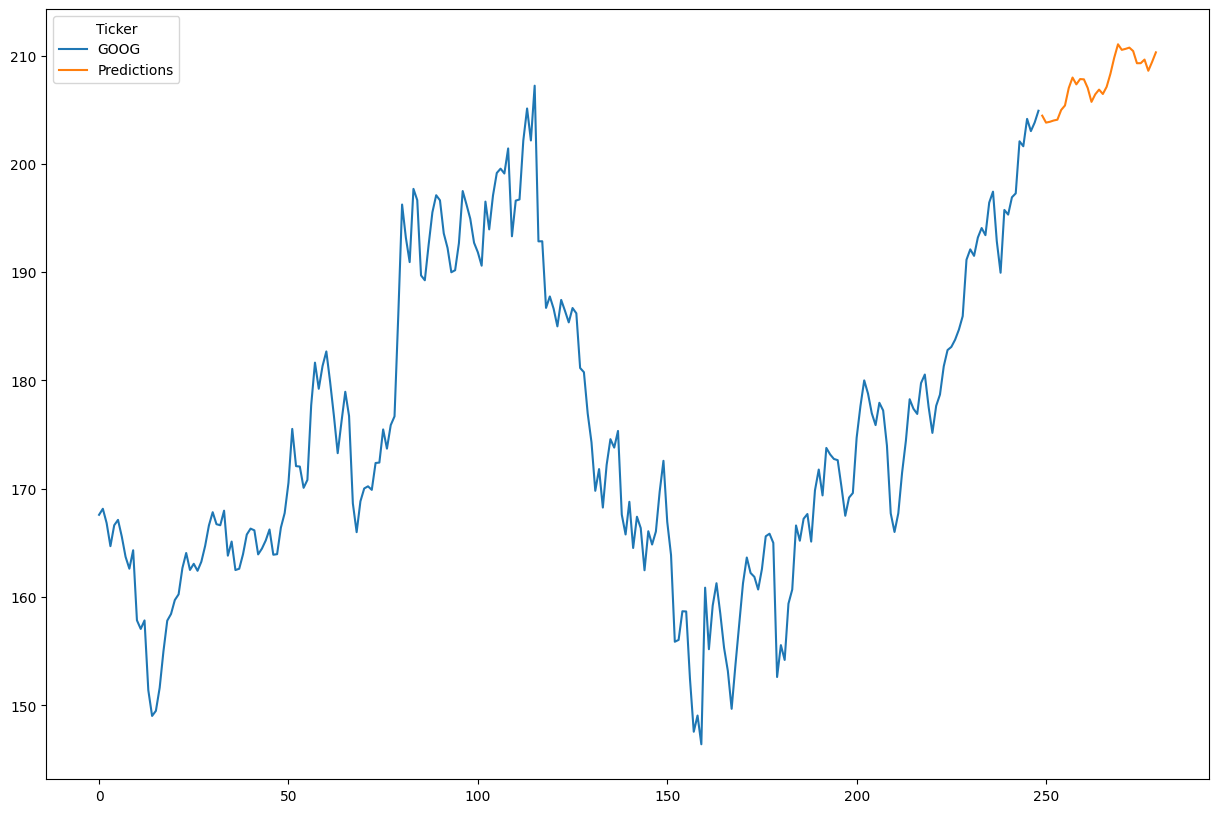

In [9]:
data["Close"].plot(legend=True, label="Training Data", figsize=(15, 10))
predictions.plot(legend=True, label="Predictions")